# List 5

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [95]:
def SIR_euler(beta, r, I_0 = 1, N = 100, dt = 0.01, n = 1000):
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = N
    I[0] = I_0
    R[0] = 0
    for i in range(1, n):
        S[i] = S[i-1] + dt*( -beta *S[i-1] * I[i-1] )
        I[i] = I[i-1] + dt*( beta * S[i-1] *I[i-1] - r * I[i-1])
        R[i] = R[i-1] + dt*( r * I[i-1])
    return S, I, R

## 1)
Check the formula for $R_0$ by solving the model numerically for different sets of parameters. Fix $N$, and vary $\alpha$ and $r$. Choose your values
such as to have combinations with both $R_0$ > 1 and $R_0$ < 1. Run
the model for each parameter combination, plot the time evolution
of each compartment and record whether there was an epidemic or
not

### a)

R_0 = 0.5005000000000001


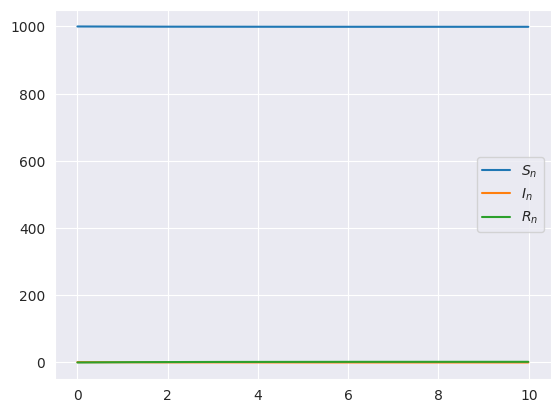

In [4]:
beta = 0.0005
r = 1
N_0 = 1000
I_0 = 1
N = N_0+I_0
n = 1000
dt = 0.01
R_0  = beta*N/r
S_n, I_n, R_n  = SIR_euler(beta, r, I_0, N_0, dt, n)
ts = np.arange(0, dt*n, dt)
print("R_0 =", R_0)
plt.plot(ts, S_n, label = "$S_n$")
plt.plot(ts, I_n, label = "$I_n$")
plt.plot(ts, R_n, label = "$R_n$")
# plt.hlines(R_0, min(ts), max(ts), colors="r", linestyles="--", label = "R_0")
plt.legend()
plt.show()

R_0 = 2.2244444444444444


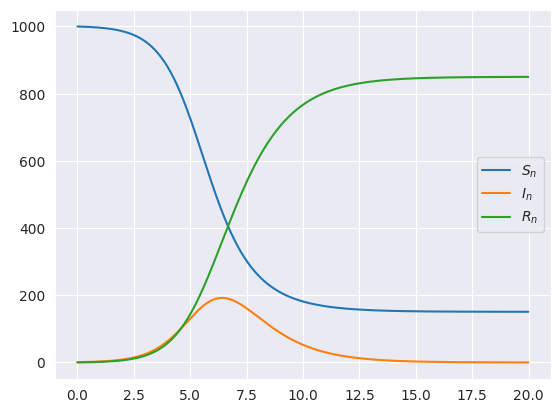

In [5]:
beta = 0.002
r = 0.9
N_0 = 1000
I_0 = 1
N = N_0+I_0

n = 2000
dt = 0.01
R_0  = beta*N/r
S_n, I_n, R_n  = SIR_euler(beta, r, I_0, N_0, dt, n)
ts = np.arange(0, dt*n, dt)
print("R_0 =", R_0)
plt.plot(ts, S_n, label = "$S_n$")
plt.plot(ts, I_n, label = "$I_n$")
plt.plot(ts, R_n, label = "$R_n$")
# plt.hlines(R_0, min(ts), max(ts), colors="r", linestyles="--", label = "R_0")
plt.legend()
plt.show()

### b)

R_0: 1.1111111111111112


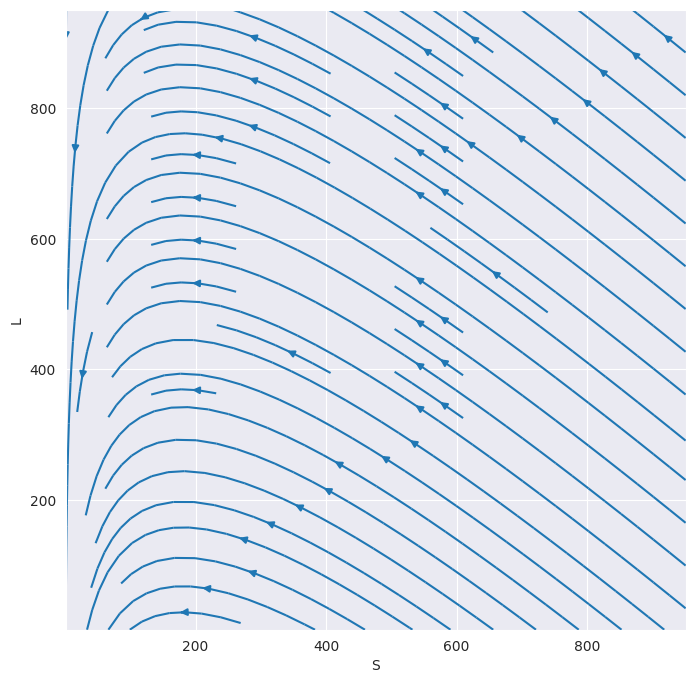

In [93]:
import numpy as np
import matplotlib.pyplot as plt


# Creating arrow
beta = 0.005
r = 0.9
N_0 = 100
L_0 = 100
N = N_0 + L_0
R_0 = beta*N/r
print("R_0:", R_0)
S = np.arange(1, 1000, 50)
L = np.arange(1, 1000, 50)

X, Y = np.meshgrid(S, L)

u = -beta * X * Y
v = beta * X * Y - r * Y

color = np.sqrt(u**2 + v**2)
fig, ax = plt.subplots(figsize =(8, 10))
ax.streamplot(X, Y, u, v, density=1., cmap='jet', arrowsize=1)
ax.set_aspect('equal')
ax.set_xlabel("S")
ax.set_ylabel("L")

plt.show()
# creating plot
# fig, ax = plt.subplots(figsize =(14, 8))
# ax.quiver(X, Y, u, v)

# ax.set_aspect('equal')
# ax.set_xlabel("S")
# ax.set_ylabel("L")
# # show plot
# plt.show()

R_0: 0.19999999999999998


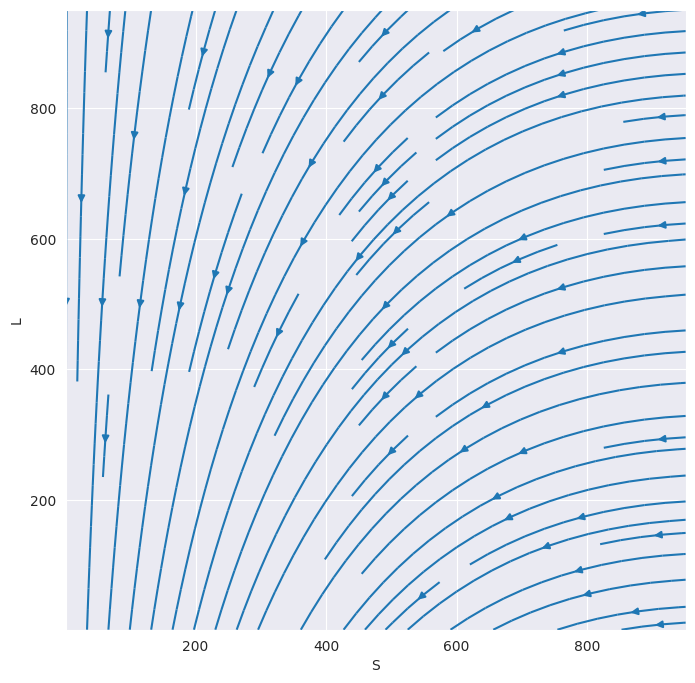

In [92]:
import numpy as np
import matplotlib.pyplot as plt


# Creating arrow
beta = 0.0001
r = 0.1
N_0 = 100
L_0 = 100
N = N_0 + L_0
R_0 = beta*N/r
print("R_0:", R_0)
S = np.arange(1, 1000, 50)
L = np.arange(1, 1000, 50)

X, Y = np.meshgrid(S, L)

u = -beta * X * Y
v = beta * X * Y - r * Y

color = np.sqrt(u**2 + v**2)
fig, ax = plt.subplots(figsize =(8, 10))
ax.streamplot(X, Y, u, v, density=1., cmap='jet', arrowsize=1)
ax.set_aspect('equal')
ax.set_xlabel("S")
ax.set_ylabel("L")

plt.show()
# creating plot
# fig, ax = plt.subplots(figsize =(14, 8))
# ax.quiver(X, Y, u, v)

# ax.set_aspect('equal')
# ax.set_xlabel("S")
# ax.set_ylabel("L")
# # show plot
# plt.show()

### c)

In [259]:
N_0 = 999
I_0 = 1
N = N_0+I_0
n = 2000
dt = 0.01

rn = 150
bn = 10

r_s = np.array(np.linspace(0.05, 2, rn))
b_s = np.array(np.linspace(0.000001, 0.002, bn))

R0_s = np.zeros((rn, bn))
max_I_s = np.zeros((rn, bn))

infected_s = np.zeros((rn, bn))
for i, r in enumerate(r_s):
    for j, beta in enumerate(b_s):
        R0_s[i,j] = beta*N/r
        _, I_n, R_n  = SIR_euler(beta, r, I_0, N_0, dt, n)
        infected_s[i,j] = R_n[-1]
        max_I_s[i,j] = max(I_n)

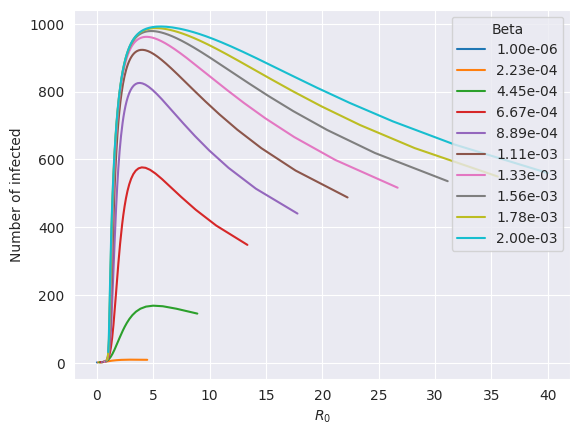

In [261]:
for i, beta in enumerate(b_s):
    plt.plot(R0_s[:,i], infected_s[:,i], label = "%.2e"%beta)
plt.ylabel("Number of infected")
plt.xlabel("$R_0$")
plt.legend(title = "Beta")
plt.show()

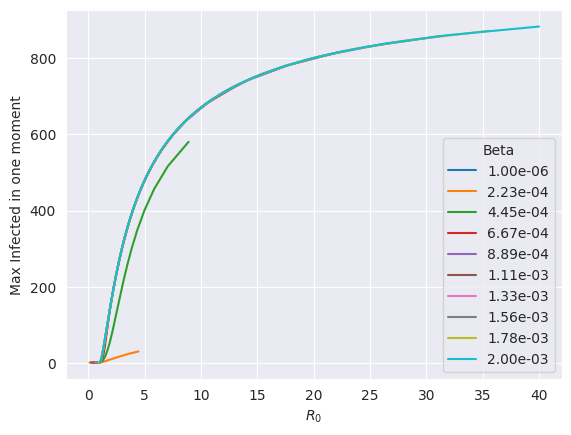

In [263]:
for i, beta in enumerate(b_s):
    plt.plot(R0_s[:,i], max_I_s[:,i], label = "%.2e"%beta)
plt.ylabel("Max Infected in one moment")
plt.xlabel("$R_0$")
plt.legend(title = "Beta")
plt.show()